Deibin Andrey Rojas Tellez Tarea 3



Arboles de Decisión – Red Wine Quality

Pasos a desarrollar 

1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

4.Dividir el dataset en Train y Test para evaluar correctamente el modelo.

5.Entrenar el modelo configurando los diferentes hiperparámetros.

6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

8.Interpretar, analizar y documentar los resultados obtenidos.

In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.feature_selection import RFE
import warnings
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import RocCurveDisplay

In [11]:
# Cargar el dataset de vinos
data = pd.read_csv('winequality-red.csv')

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc

In [24]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [57]:
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [26]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

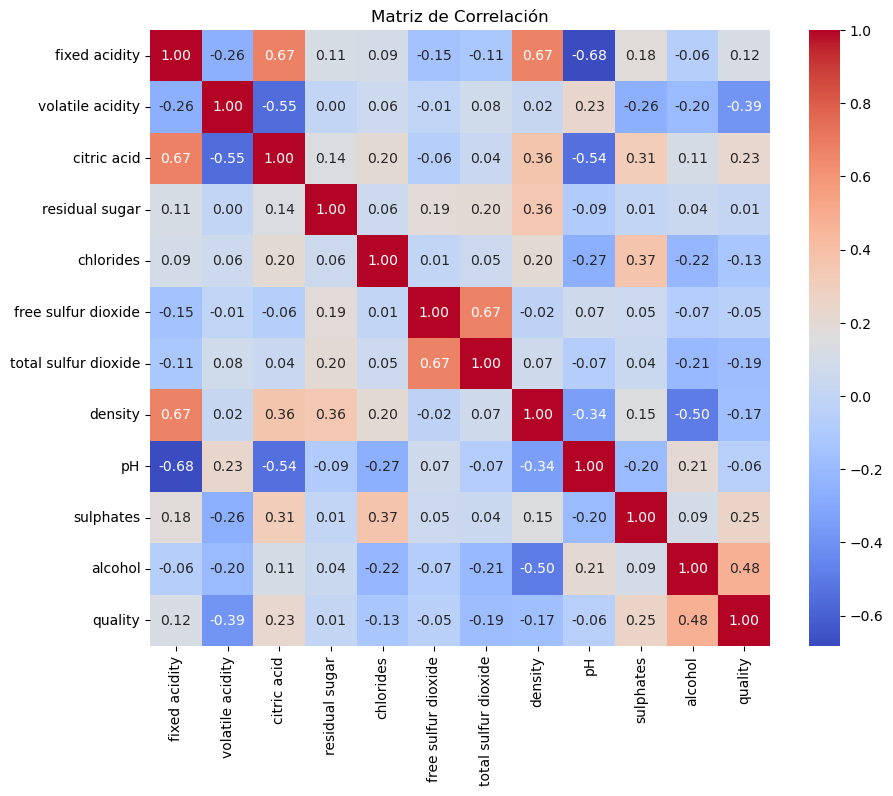

In [59]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [28]:
data.shape

(1599, 12)

(array([ 37., 515., 323., 257., 232., 119.,  87.,  21.,   7.,   1.]),
 array([ 8.4 ,  9.05,  9.7 , 10.35, 11.  , 11.65, 12.3 , 12.95, 13.6 ,
        14.25, 14.9 ]),
 <BarContainer object of 10 artists>)

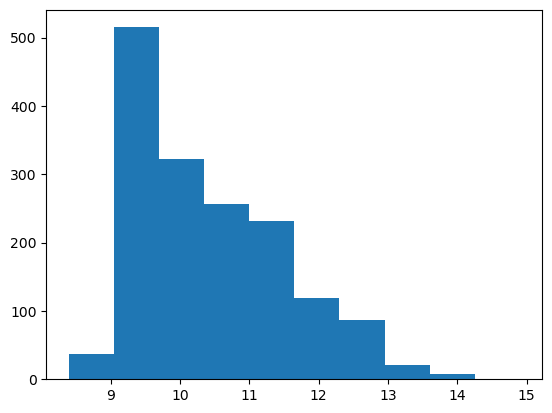

In [30]:
plt.hist(data.alcohol)

<Axes: xlabel='quality', ylabel='count'>

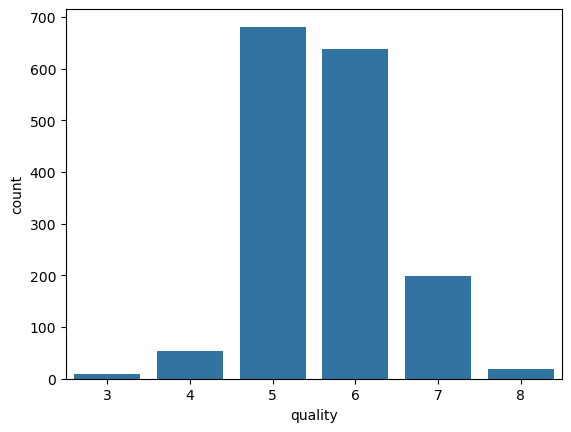

In [34]:
# Distribución de la calidad
sns.countplot(x='quality', data=data)

<Axes: xlabel='quality', ylabel='alcohol'>

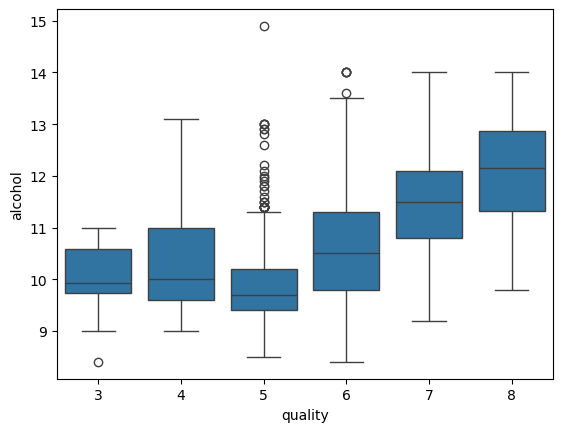

In [36]:
# Diagrama de cajas de calidad vs. alcohol
sns.boxplot(x='quality', y='alcohol', data=data)

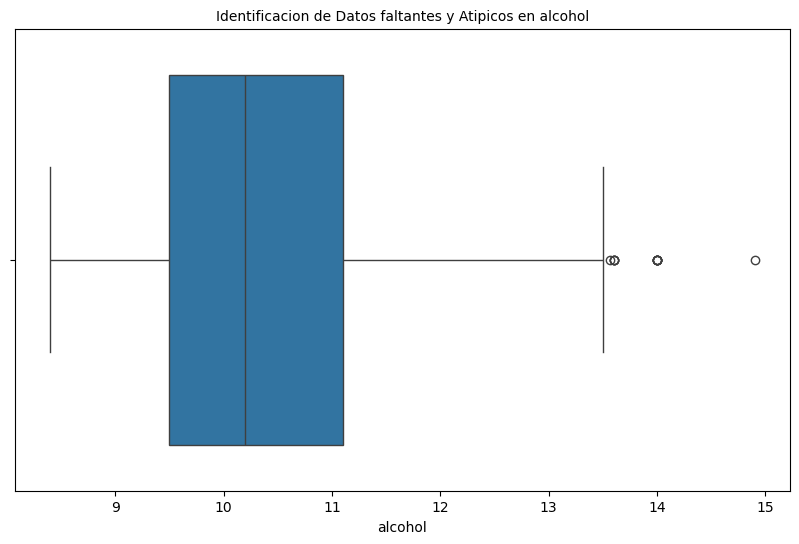

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['alcohol'])
plt.title('Identificacion de Datos faltantes y Atipicos en alcohol', fontsize=10)
plt.show()

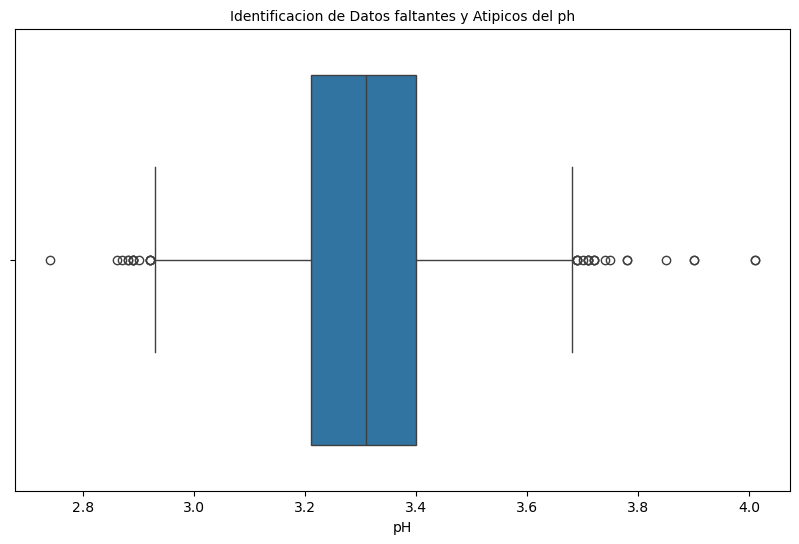

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['pH'])
plt.title('Identificacion de Datos faltantes y Atipicos del ph', fontsize=10)
plt.show()

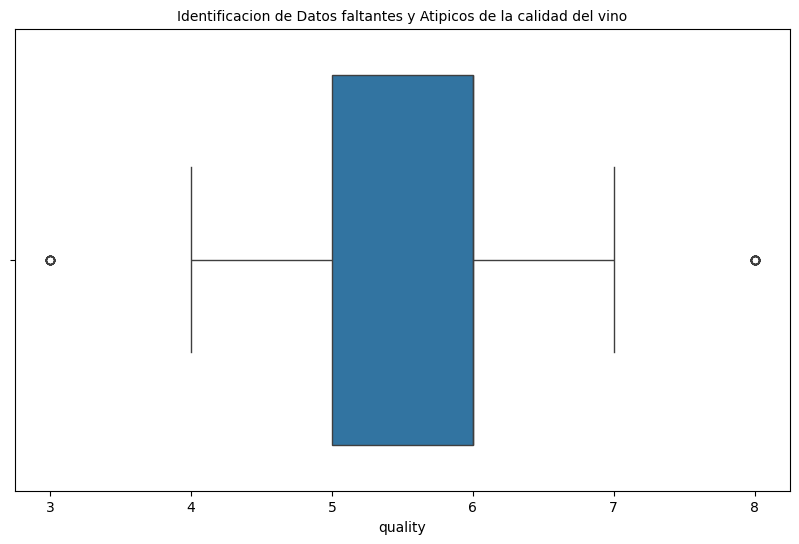

In [61]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['quality'])
plt.title('Identificacion de Datos faltantes y Atipicos de la calidad del vino', fontsize=10)
plt.show()

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

In [64]:
# Quitar valores atípicos basados en el rango intercuartílico (IQR)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [66]:
# Normalización de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('quality', axis=1))

In [74]:
scaled_data = pd.DataFrame(scaled_data, columns=data.columns[:-1])

In [76]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1179 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1179 non-null   float64
 1   volatile acidity      1179 non-null   float64
 2   citric acid           1179 non-null   float64
 3   residual sugar        1179 non-null   float64
 4   chlorides             1179 non-null   float64
 5   free sulfur dioxide   1179 non-null   float64
 6   total sulfur dioxide  1179 non-null   float64
 7   density               1179 non-null   float64
 8   pH                    1179 non-null   float64
 9   sulphates             1179 non-null   float64
 10  alcohol               1179 non-null   float64
 11  quality               1179 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 119.7 KB


3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [93]:
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = data['quality']

# Crear un clasificador de árbol de decisión
clf = DecisionTreeClassifier()

In [103]:
# Seleccionar las características más relevantes utilizando RFE
rfe = RFE(clf, n_features_to_select=4)
rfe.fit(X, y)

print("Características seleccionadas: ", X.columns[rfe.support_])

# Ajustar los hiperparámetros del árbol de decisión
param_grid = {'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Crear un grid search
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X, y)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros: ", grid_search.best_params_)

Características seleccionadas:  Index(['volatile acidity', 'pH', 'sulphates', 'alcohol'], dtype='object')
Mejores hiperparámetros:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


* Los mejores carateristicas otorgadas por el arbol de decision son volatile acidity, ph, sulphates y alcohol

4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [124]:
# Seleccionar las características relevantes
X = data[['volatile acidity', 'pH', 'sulphates', 'alcohol']]

# Seleccionar la variable objetivo
y = data['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
print (X_train)

      volatile acidity    pH  sulphates  alcohol
1520              0.53  3.38       0.83     10.3
626               0.60  3.36       0.49      9.1
458               0.33  3.26       0.74     11.2
392               0.37  3.18       0.51      9.5
524               0.43  3.23       0.64      9.5
...                ...   ...        ...      ...
1427              0.41  3.30       0.58     11.2
1499              0.74  3.45       0.63     11.5
1538              0.64  3.57       0.63     12.0
1184              0.64  3.36       0.70     10.9
1534              0.56  3.42       0.62     11.7

[943 rows x 4 columns]


In [128]:
print (y_train)

1520    6
626     5
458     7
392     5
524     5
       ..
1427    5
1499    6
1538    5
1184    5
1534    7
Name: quality, Length: 943, dtype: int64


5. Entrenar el modelo configurando los diferentes  hiperparámetros

[Text(0.49046434341950645, 0.9782608695652174, 'x[3] <= -0.219\ngini = 0.617\nsamples = 943\nvalue = [24, 411, 399, 109]'),
 Text(0.1951399089306698, 0.9347826086956522, 'x[2] <= -0.499\ngini = 0.507\nsamples = 481\nvalue = [16, 301, 152, 12]'),
 Text(0.08801410105757931, 0.8913043478260869, 'x[3] <= -0.631\ngini = 0.415\nsamples = 219\nvalue = [11, 161, 45, 2]'),
 Text(0.03219741480611046, 0.8478260869565217, 'x[3] <= -1.326\ngini = 0.346\nsamples = 150\nvalue = [8, 119, 22, 1]'),
 Text(0.01692126909518214, 0.8043478260869565, 'x[1] <= 0.148\ngini = 0.64\nsamples = 5\nvalue = [2, 1, 2, 0]'),
 Text(0.013160987074030552, 0.7608695652173914, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0]'),
 Text(0.020681551116333723, 0.7608695652173914, 'x[2] <= -1.098\ngini = 0.444\nsamples = 3\nvalue = [2, 1, 0, 0]'),
 Text(0.01692126909518214, 0.717391304347826, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]'),
 Text(0.02444183313748531, 0.717391304347826, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 

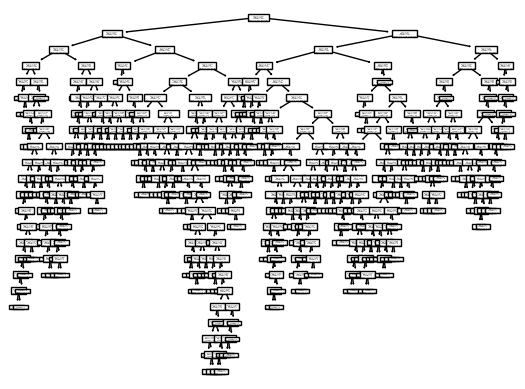

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de árboles de decisión con los datos escalados
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Graficar el árbol de decisión
plot_tree(model)

6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. 

In [144]:
# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 0  6  3  0]
 [ 2 69 30  1]
 [ 0 26 67  6]
 [ 0  4  8 14]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.66      0.68      0.67       102
           6       0.62      0.68      0.65        99
           7       0.67      0.54      0.60        26

    accuracy                           0.64       236
   macro avg       0.49      0.47      0.48       236
weighted avg       0.62      0.64      0.63       236



Se puede observar que existe una  presicion aproximada del 62%  lo que indica que las caracteristicas selecionadas influyen notoriamente en la calidad del vino, lo cual tiene razon ya que un vino sin alcohol de por si es mas una bebida azucarada y no un vino.

7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

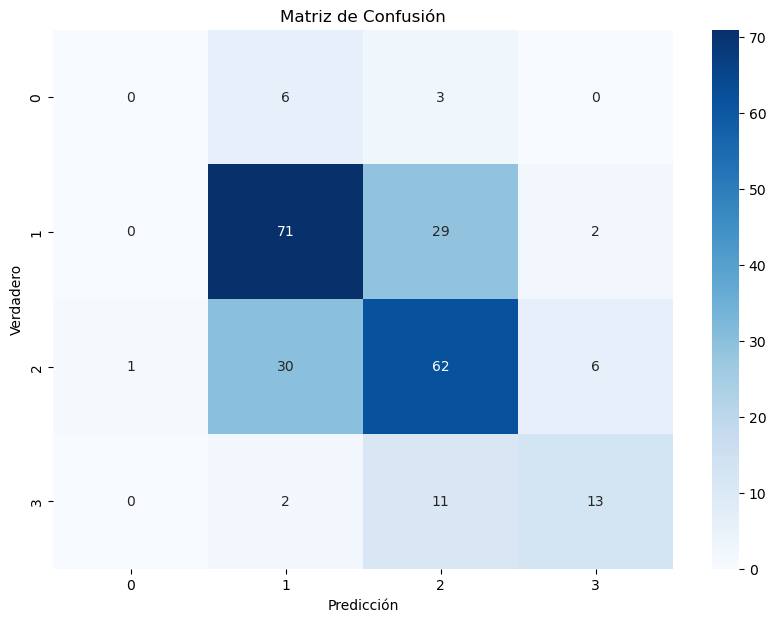

In [147]:
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Matriz de Confusión 
plt.figure(figsize=(10, 7)) 
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción') 
plt.ylabel('Verdadero') 
plt.title('Matriz de Confusión') 
plt.show() 

In [173]:
# Reporte de Clasificación 

report = classification_report(y_test, y_pred, output_dict=True) 
metrics = ['precision', 'recall', 'f1-score'] 
classes = report.keys() 

# Filtramos las métricas para las clases y eliminamos promedios 
metrics_data = {metric: [report[cls][metric] for cls in classes if cls 
not in ['accuracy', 'macro avg', 'weighted avg']] for metric in 
metrics} 

# Crear DataFrame para visualizar 
metrics_df = pd.DataFrame(metrics_data) 
metrics_df.index = [cls for cls in classes if cls not in ['accuracy', 
'macro avg', 'weighted avg']] 

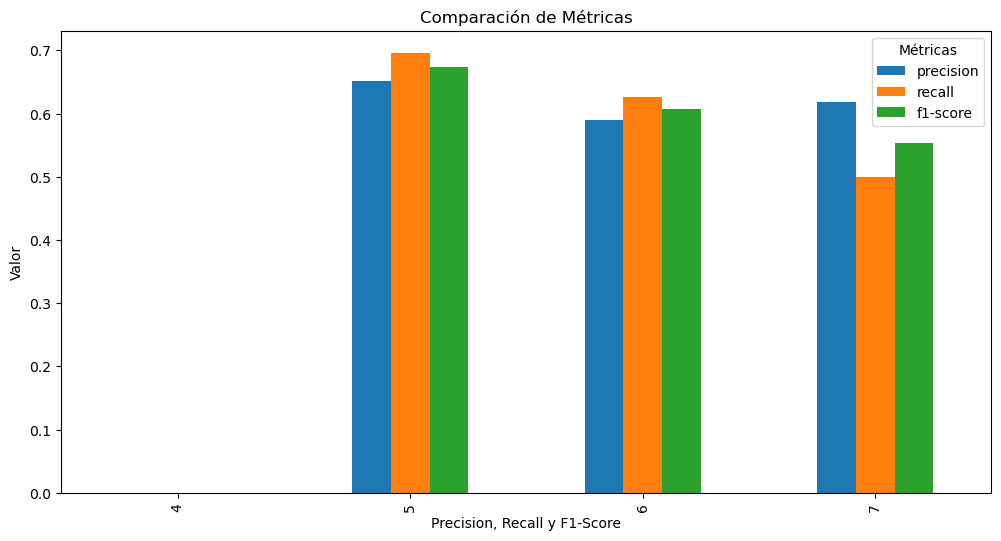

In [204]:
# Gráfica de Barras de las Métricas
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de Métricas')
plt.ylabel('Valor')
plt.xlabel('Precision, Recall y F1-Score')
plt.legend(title='Métricas')
plt.show()

In [206]:
print(y_test.unique())

[5 7 6 4]


8. Interpretar, analizar y documentar los resultados obtenidos.

En esta actividad quise comprobar como algunos ingredientes afectan de forma significativa el sabor de un vino o bueno su calidad, ya que no sabai cual selecionar hice un diagrama de arbol para determinar las caracteriticas en el paso 3

lo cual menciones "Los mejores carateristicas otorgadas por el arbol de decision son volatile acidity, ph, sulphates y alcohol" apartir de ahi pues se realizo el paso 4 con estas caracteriticas luego se entreno el modelo y cree su respetivo arbol con su grafica, no te ademas que la precision apuntaba al rededor d eun 62-4% de que estas caracteriticas eran muy relevantes, finalmente se relizaron el resto de graficas y conclui quefalso 4

* De la Matriz de Confusión podemos interpretar:
Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 71

Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 62

Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 29

Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como f

*De la grafica de las metricas determine después de evaluar el modelo utilizando un conjunto de datos de prueba, se han obtenido los siguientes resultados para cada clase de calidad (en una escala de 0 a 10):

Precision, Recall y F1-Score por clase: Se observó cómo el modelo se comportó en cada clase de calidad, es decir, cuán bien logró predecir la calidad del vino en comparación con las etiquetas reales.

El reporte también incluye promedios, como el macro avg y weighted avg, que nos dan una visión general del desempeño del modelo considerando todas las clases